In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer, MinMaxScaler

In [44]:
iris = pd.read_csv("/content/IRIS.csv")

In [45]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [46]:
iris.species.value_counts()

species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='species'>

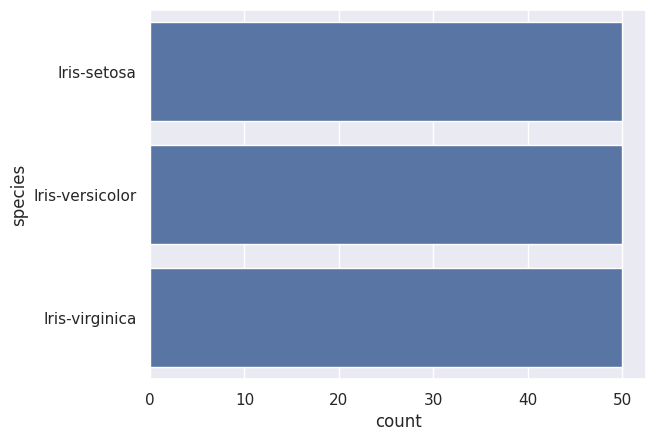

In [47]:
sns.set_theme()
sns.countplot(data=iris.species)

In [48]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [49]:
X = iris.drop('species', axis = 1)
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [50]:
y = iris['species']

In [51]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [52]:
y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [53]:
encoder = LabelBinarizer()

In [54]:
y = encoder.fit_transform(y)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)

In [56]:
scaler = MinMaxScaler()

In [57]:
scaler.fit(X_train)

MinMaxScaler()

In [58]:
scaled_X_train = scaler.transform(X_train)

In [59]:
scaled_X_test = scaler.transform(X_test)

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [61]:
model = Sequential([
    Dense(4, activation = 'relu', input_shape = [4,]),
    Dense(3, activation = 'softmax')
])
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])


In [62]:
from tensorflow.keras.callbacks import EarlyStopping

In [63]:
early_stop = EarlyStopping(patience=10)

In [64]:
model.fit(x = scaled_X_train, y = y_train, epochs = 300,
          validation_data = (scaled_X_test, y_test), callbacks = [early_stop])

Epoch 1/300
4/4 [==============================] - 1s 87ms/step - loss: 1.2436 - accuracy: 0.3167 - val_loss: 1.1850 - val_accuracy: 0.4000
Epoch 2/300
4/4 [==============================] - 0s 13ms/step - loss: 1.2369 - accuracy: 0.3167 - val_loss: 1.1824 - val_accuracy: 0.4000
Epoch 3/300
4/4 [==============================] - 0s 14ms/step - loss: 1.2306 - accuracy: 0.3167 - val_loss: 1.1798 - val_accuracy: 0.4333
Epoch 4/300
4/4 [==============================] - 0s 13ms/step - loss: 1.2246 - accuracy: 0.3167 - val_loss: 1.1775 - val_accuracy: 0.4333
Epoch 5/300
4/4 [==============================] - 0s 14ms/step - loss: 1.2187 - accuracy: 0.3167 - val_loss: 1.1751 - val_accuracy: 0.4000
Epoch 6/300
4/4 [==============================] - 0s 12ms/step - loss: 1.2135 - accuracy: 0.3167 - val_loss: 1.1725 - val_accuracy: 0.4000
Epoch 7/300
4/4 [==============================] - 0s 13ms/step - loss: 1.2075 - accuracy: 0.3000 - val_loss: 1.1700 - val_accuracy: 0.4000
Epoch 8/300
4/4 [===

In [65]:
metrics = pd.DataFrame(model.history.history)

<Axes: >

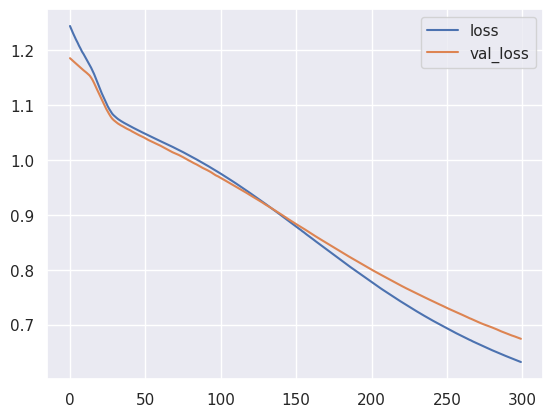

In [66]:
metrics[['loss', 'val_loss']].plot()

<Axes: >

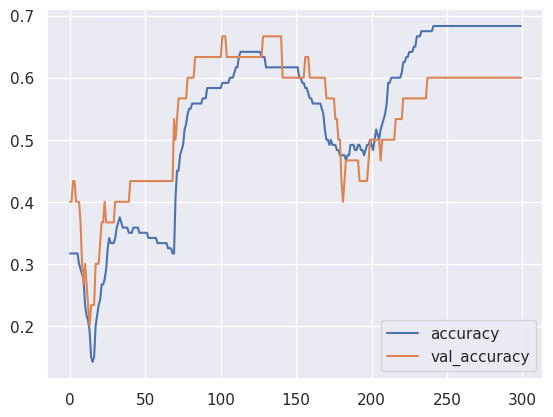

In [67]:
metrics[['accuracy', 'val_accuracy']].plot()

In [68]:
model.evaluate(scaled_X_test, y_test, verbose = 0)

[0.674294114112854, 0.6000000238418579]

In [69]:
epochs = len(metrics)

In [70]:
epochs

300

In [71]:
scaled_X = scaler.fit_transform(X)

In [72]:
model = Sequential([
    Dense(4, activation = 'relu', input_shape = [4,]),
    Dense(3, activation = 'softmax')
])
model.compile(optimizer = 'adam',
              loss = 'categorical_crossentropy',
              metrics = ['accuracy'])


In [73]:
model.fit(scaled_X, y, epochs = epochs)

Epoch 1/300
5/5 [==============================] - 1s 6ms/step - loss: 1.3710 - accuracy: 0.0600
Epoch 2/300
5/5 [==============================] - 0s 3ms/step - loss: 1.3559 - accuracy: 0.0533
Epoch 3/300
5/5 [==============================] - 0s 4ms/step - loss: 1.3423 - accuracy: 0.0533
Epoch 4/300
5/5 [==============================] - 0s 4ms/step - loss: 1.3295 - accuracy: 0.0467
Epoch 5/300
5/5 [==============================] - 0s 4ms/step - loss: 1.3169 - accuracy: 0.0400
Epoch 6/300
5/5 [==============================] - 0s 4ms/step - loss: 1.3053 - accuracy: 0.0400
Epoch 7/300
5/5 [==============================] - 0s 4ms/step - loss: 1.2944 - accuracy: 0.0333
Epoch 8/300
5/5 [==============================] - 0s 4ms/step - loss: 1.2835 - accuracy: 0.0200
Epoch 9/300
5/5 [==============================] - 0s 4ms/step - loss: 1.2734 - accuracy: 0.0133
Epoch 10/300
5/5 [==============================] - 0s 4ms/step - loss: 1.2642 - accuracy: 0.0133
Epoch 11/300
5/5 [===========

In [74]:
model.save("final_iris_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [75]:
import joblib

joblib.dump(scaler, 'iris_scaler.pkl')

['iris_scaler.pkl']

In [76]:
from tensorflow.keras.models import load_model

In [77]:
flower_model = load_model('final_iris_model.h5')

In [79]:
flower_scaler = joblib.load('iris_scaler.pkl')

In [80]:
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa


In [81]:
flower_example = {'sepal_length': 5.1,
                  'sepal_width': 3.5,
                  'petal_length': 1.4,
                  'petal_width': 0.2}

In [116]:
def return_prediction(model, scaler, sample_json):
  s_len = sample_json['sepal_length']
  s_wid = sample_json["sepal_width"]
  p_len = sample_json['petal_length']
  p_wid = sample_json['petal_width']

  flower = [[s_len, s_wid, p_len, p_wid]]

  classes = np.array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
  flower = scaler.transform(flower)

  class_ind =  np.argmax(model.predict(flower), axis = -1)
  return classes[class_ind][0];


In [117]:
return_prediction(flower_model, flower_scaler, flower_example)

1/1 [==============================] - 0s 51ms/step


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


'Iris-setosa'

In [115]:
from tensorflow.keras.models import load_model
import numpy as np
import joblib

flower_model = load_model('final_iris_model.h5')
flower_scaler = joblib.load("iris_scaler.pkl")

def return_prediction(model, scaler, sample_json):
  s_len = sample_json['sepal_length']
  s_wid = sample_json["sepal_width"]
  p_len = sample_json['petal_length']
  p_wid = sample_json['petal_width']

  flower = [[s_len, s_wid, p_len, p_wid]]

  classes = np.array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])
  flower = scaler.transform(flower)

  class_ind =  np.argmax(model.predict(flower), axis = -1)
  return classes[class_ind][0]